In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/MultipleLinearRegression/Student_Performance.csv")

In [ ]:
data.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
data.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
le = LabelEncoder()
data[data.columns[2]] = le.fit_transform(data[data.columns[2]])

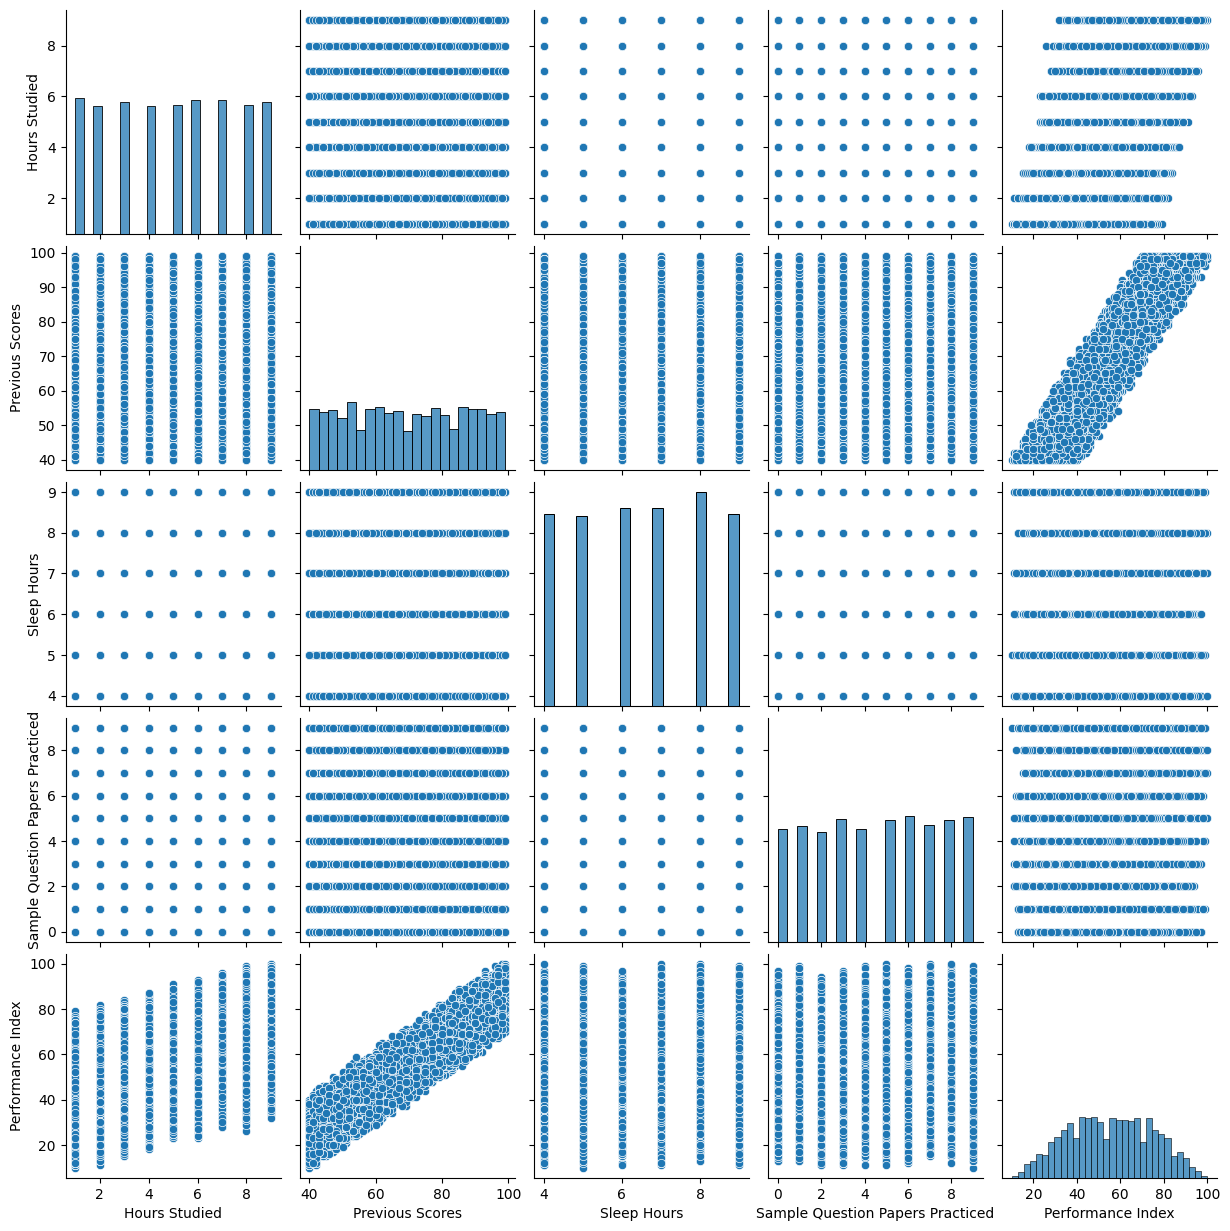

In [ ]:
sns.pairplot(data)

In [ ]:
X = data.drop(data.columns[5],axis=1)
y = data[data.columns[5]]

In [ ]:
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [ ]:
y.head()

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [ ]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=True,test_size=0.2)

In [ ]:
x = PolynomialFeatures(degree=3)
x_poly = x.fit_transform(train_x)

model = LinearRegression()
model.fit(x_poly,train_y)

LinearRegression()

In [ ]:
model.predict(x_poly)



array([42.57380405, 43.13445168, 69.90971471, ..., 88.14091623,
       77.89149236, 33.46942739])

In [ ]:
test_x,train_y

(      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
 9953              6               73                           0            7   
 3850              1               89                           1            7   
 4962              3               97                           1            8   
 3886              8               70                           0            5   
 5437              7               94                           1            7   
 ...             ...              ...                         ...          ...   
 3919              7               70                           0            7   
 162               7               45                           1            7   
 7903              3               84                           0            9   
 2242              5               45                           0            7   
 2745              1               56                           1            8   
 
       Sample 

In [ ]:
y = PolynomialFeatures(degree=3)
y_poly = y.fit_transform(test_x)

In [ ]:
print('r2 score' ,r2_score(test_y, model.predict(y_poly)))
print('mean square error',mean_squared_error(test_y,model.predict(y_poly)))
print('mean absolute error',mean_absolute_error(test_y,model.predict(y_poly)))
print('root mean square error',root_mean_squared_error(test_y,model.predict(y_poly)))


r2 score 0.9883982376534157
mean square error 4.256071360604098
mean absolute error 1.6417484332926906
root mean square error 2.063024808528511
